<a href="https://colab.research.google.com/github/hjk1996/blog_post/blob/main/machine_learning_lecture_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [54]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import torch
from sklearn.model_selection import train_test_split
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from glob import glob
from torchvision.transforms.transforms import Compose
from typing import List
from sklearn.preprocessing import MinMaxScaler
from pandas.core.frame import DataFrame
import copy
import torchvision.models as models
from torch.nn.modules.module import Module
import scipy
import matplotlib.pyplot as plt
import cv2

In [3]:
def resize_images(folder_dir: str, width: int, height: int) -> None:
  for image_dir in glob(folder_dir + "/*"):
    image = Image.open(image_dir)
    image = image.resize((width, height))
    image.save(image_dir)

In [4]:
# Model Parameters
MODEL_NAME = 'EfficientNetB0'
FEATURE_OUT = 1280
META_DATA_SIZE = 7
IMAGE_SIZE = 224

In [5]:
# Data
IMAGE_ZIP_FILE_DIR = "./drive/MyDrive/research/2022_spring_machine_learning_lecture/images.zip.zip"
IMAGE_META_DATA_DIR = "./drive/MyDrive/research/2022_spring_machine_learning_lecture/image_meta_data.csv"
ZIP_EXTRACTING_DIR = "./data"

In [6]:
drive.mount('./drive', force_remount=True)

Mounted at ./drive


In [7]:
# 이미지 압축 풀 폴더 생성
try:
  os.mkdir('./data')
except FileExistsError:
  print("Direction already exists")

In [8]:
# 이미지 파일 압축풀기
with zipfile.ZipFile(IMAGE_ZIP_FILE_DIR) as f:
  f.extractall(ZIP_EXTRACTING_DIR)

In [9]:
# 이미지 리사이징
resize_images(ZIP_EXTRACTING_DIR, IMAGE_SIZE, IMAGE_SIZE)

In [10]:
# 이미지 레이블, 메타데이터 불러오기
image_meta_data = pd.read_csv(IMAGE_META_DATA_DIR)

In [11]:
image_meta_data.columns

Index(['id', 'left', 'right', 'ambulance', 'special_car', 'bus', 'normal_car',
       'motor_cycle', 'taxi', 'truck', 'hash'],
      dtype='object')

In [12]:
scaler = MinMaxScaler()
image_meta_data[['ambulance', 'special_car', 'bus', 'normal_car', 'motor_cycle', 'taxi', 'truck']] = scaler.fit_transform(image_meta_data[['ambulance', 'special_car', 'bus', 'normal_car', 'motor_cycle', 'taxi', 'truck']])

In [13]:
image_meta_data

,id,left,right,ambulance,special_car,bus,normal_car,motor_cycle,taxi,truck,hash
0,0,1,0,0.0,0.0,0.090909,0.369565,0.0,0.0,0.166667,3713081631936575706
1,1,1,0,0.0,0.0,0.181818,0.413043,0.0,0.0,0.000000,3713081631936575706
2,2,1,0,0.0,0.0,0.090909,0.347826,0.0,0.0,0.166667,3713081631936575706
3,3,1,0,0.0,0.0,0.181818,0.413043,0.0,0.0,0.000000,3713081631936575706
4,4,1,0,0.0,0.0,0.090909,0.369565,0.0,0.0,0.166667,3713081631936575706
...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,0,1,0.0,0.0,0.727273,0.326087,0.0,0.0,0.000000,3713080549409410656
1496,1496,0,1,0.0,0.0,0.727273,0.326087,0.0,0.0,0.000000,3713080549409410656
1497,1497,0,1,0.0,0.0,0.727273,0.326087,0.0,0.0,0.000000,3713080549409410656
1498,1498,0,1,0.0,0.0,0.727273,0.304348,0.0,0.0,0.000000,3713080549409410656


In [14]:
# 독립변수, 종속변수 분할
x = image_meta_data[['id', 'ambulance', 'special_car', 'bus', 'normal_car',
       'motor_cycle', 'taxi', 'truck']]
y = image_meta_data[["id","left", "right"]]

In [15]:
# 훈련, 검증 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=image_meta_data['hash'])

In [16]:
x_train

,id,ambulance,special_car,bus,normal_car,motor_cycle,taxi,truck
1402,1402,0.0,0.0,0.727273,0.326087,0.0,0.00,0.000000
1396,1396,0.0,0.0,0.363636,0.173913,0.0,0.50,0.500000
853,853,0.0,0.0,0.363636,0.282609,0.0,0.50,0.166667
243,243,0.0,0.0,0.000000,0.434783,0.5,0.50,0.000000
1175,1175,0.0,0.0,0.727273,0.195652,0.0,0.75,0.166667
...,...,...,...,...,...,...,...,...
1449,1449,0.0,0.0,0.727273,0.239130,0.0,0.00,0.000000
1166,1166,0.0,0.0,1.000000,0.000000,0.5,0.50,0.000000
1252,1252,0.0,0.0,0.636364,0.152174,0.0,0.50,0.166667
230,230,0.0,0.0,0.000000,0.434783,0.5,0.00,0.000000


# image augmentation methods

In [17]:
# 30% 확률로 밝기를 20% 범위 안에서 조정함.
random_apply1 = transforms.RandomApply(torch.nn.ModuleList([
                            transforms.ColorJitter(brightness=0.2)]), 
                            p=0.3)

# 30% 확률로 이미지를 -20도, 20도 범위 안에서 회전시킴
random_apply2 = transforms.RandomApply(torch.nn.ModuleList([
                            transforms.RandomRotation(degrees=(-20, 20))]),
                            p=0.3)

In [18]:
# 훈련 이미지 대상 augmentation
train_transform = transforms.Compose([
                            random_apply1,
                            random_apply2,
                            transforms.ToTensor(),
                            transforms.Normalize(mean=0.5,
                                 std=0.5)])

# 검증 이미지 대상 augmentation (정규화만 적용)
val_transform = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize(mean=0.5,
                                 std=0.5)
])

# dataset, dataloader

In [19]:
class MyDataset(Dataset):

  def __init__(self, image_directory: str, x: DataFrame, y: DataFrame, train_transform: Compose, val_transform: Compose, train=True):
    self._image_directory = image_directory
    self._x = x
    self._y = y
    self._train_transform = train_transform
    self._val_transform = val_transform
    self.train = train

  def __len__(self):
    return len(self._x)

  def __getitem__(self, idx):
    img_id = self._x['id'].values[idx]
    img_file_dir = self._image_directory + f"/{img_id}.jpg"
    img = Image.open(img_file_dir)
    img_meta_data = self._x[self._x["id"] == img_id].iloc[:, 1:].values
    target = self._y[self._y["id"] == img_id].iloc[:, 1:].values


    if self.train:
      img = self._train_transform(img)
    else:
      img = self._val_transform(img)
    
    x = torch.Tensor([img_meta_data]).view(1, -1)
    y = torch.Tensor(target).view(1, -1)

    return img, x, y

In [20]:
train_dataset = MyDataset("./data", x_train, y_train, train_transform=train_transform, val_transform=val_transform)
val_dataset = MyDataset("./data", x_test, y_test, train_transform=train_transform, val_transform=val_transform, train=False)

In [21]:
dataset_length = {"train": len(train_dataset), "val": len(val_dataset)}

In [22]:
train_dataloader = DataLoader(train_dataset, batch_size=16)
val_dataloader = DataLoader(val_dataset)

In [23]:
dataloaders = {"train": train_dataloader, "val": val_dataloader}

# model

In [24]:
class FeatureMapHandler(torch.nn.Module):
  def __init__(self, feature_map_size: int, meta_data_size: int):
    super().__init__()
    
    self.block1 = torch.nn.Sequential(
        torch.nn.Linear(in_features=feature_map_size, out_features=meta_data_size),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(meta_data_size)
    )

    self.block2 = torch.nn.Sequential(
        torch.nn.Linear(in_features=meta_data_size, out_features=1),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(1)
    )

  def forward(self, x):
    x = self.block1(x)
    return self.block2(x).view(-1, 1, 1)

In [25]:
class MetaDataHandler(torch.nn.Module):

  def __init__(self, meta_data_size: int):
    super().__init__()

    self.block = torch.nn.Sequential(
        torch.nn.Linear(in_features=meta_data_size, out_features=1),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(num_features=1)
    )
  
  def forward(self, x):
    return self.block(x).view(-1, 1, 1)


In [26]:
class Classifier(torch.nn.Module):
  def __init__(self, feature_map_size: int, meta_data_size: int):
    super().__init__()

    self.feature_map_hanlder = FeatureMapHandler(feature_map_size, meta_data_size)
    self.meta_data_handler = MetaDataHandler(meta_data_size)
    self.linear = torch.nn.Linear(in_features=2, out_features=2)

  def forward(self, feature_map, meta_data):
    out1 = self.feature_map_hanlder(feature_map)
    out2 = self.meta_data_handler(meta_data)
    out = torch.cat((out1, out2), -1)
    return self.linear(out)

In [27]:
class BlockedRoadDetector(torch.nn.Module):
  def __init__(self, backbone: Module, feature_map_size: int, meta_data_size: int):
    super().__init__()

    self.backbone = backbone
    self.classifier = Classifier(feature_map_size, meta_data_size)

  def forward(self, img, meta_data):
    feature_map = self.backbone(img)
    out = self.classifier(feature_map, meta_data)
    return out

In [28]:
class PassingLayer(torch.nn.Module):
  def __init__(self):
    super().__init__()
  
  def forward(self, x):
    return x

In [29]:
def make_backbone_network(model: Module):
  model.classifier = PassingLayer()
  return model

In [ ]:
backbone = make_backbone_network(models.efficientnet_b0())
model = BlockedRoadDetector(backbone, FEATURE_OUT, META_DATA_SIZE)
model.cuda()

BlockedRoadDetector(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): ConvNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (sc

# train

In [ ]:
def train_model(model: Module, dataloaders: dict, device: str, num_epochs: int =500, lr: float = 0.1):
  device = torch.device(device)
  model_weights_when_best_score = copy.deepcopy(model.state_dict())
  best_acc = .0

  optim = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = torch.nn.BCEWithLogitsLoss()
  sigmoid = torch.nn.Sigmoid()
  for epoch in range(num_epochs):
      print('Epoch {}/{}'.format(epoch, num_epochs - 1))
      print('-' * 10)

      for phase in ["train", "val"]:
        if phase == "train":
          model.train()
        else:
          model.eval()

        total_loss = 0.0
        total_corrects = 0


        for img, meta_data, target in dataloaders[phase]:
          img = img.to(device)
          meta_data = meta_data.to(device)
          target = target.to(device)

          optim.zero_grad()

          with torch.set_grad_enabled(phase == "train"):
            pred_logit = model(img, meta_data)
            pred_logit = sigmoid(pred_logit)
            pred = torch.where(pred_logit >= 0.5, 1.0, 0.0)
            loss = criterion(pred_logit, target)

            if phase == "train":
              loss.backward()
              optim.step()

          total_loss += loss.item()
          corrects = torch.sum(target == pred, 1)
          # print(corrects)
          # print(corrects)
          corrects = torch.sum(corrects, 1)
          corrects = torch.where(corrects == 2, True, False)
          corrects = torch.sum(corrects)
          # print(corrects)
          total_corrects += corrects.item()
      
        epoch_loss = total_loss / len(dataloaders[phase])
        epoch_acc = total_corrects / dataset_length[phase]

        print(f'[{phase}] bce_loss: {epoch_loss:.4f} || acc: {epoch_acc:.4f}' )


        if phase == 'val' and epoch_acc > best_acc:
          best_acc = epoch_acc
          model_weights_when_best_score = copy.deepcopy(model.state_dict())

  model.load_state_dict(model_weights_when_best_score)


In [ ]:
train_model(model, dataloaders, "cuda", lr=0.01)

Epoch 0/499
----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)


[train] bce_loss: 0.7142 || acc: 0.4486
[val] bce_loss: 0.7035 || acc: 0.2733
Epoch 1/499
----------
[train] bce_loss: 0.6313 || acc: 0.7276
[val] bce_loss: 0.5975 || acc: 0.8956
Epoch 2/499
----------
[train] bce_loss: 0.6059 || acc: 0.8162
[val] bce_loss: 0.6464 || acc: 0.6289
Epoch 3/499
----------
[train] bce_loss: 0.6050 || acc: 0.8048
[val] bce_loss: 0.6534 || acc: 0.6467
Epoch 4/499
----------
[train] bce_loss: 0.5924 || acc: 0.8429
[val] bce_loss: 0.6181 || acc: 0.8000
Epoch 5/499
----------
[train] bce_loss: 0.5734 || acc: 0.8952
[val] bce_loss: 0.5660 || acc: 0.9111
Epoch 6/499
----------
[train] bce_loss: 0.5749 || acc: 0.8838
[val] bce_loss: 0.5628 || acc: 0.9133
Epoch 7/499
----------
[train] bce_loss: 0.5822 || acc: 0.8562
[val] bce_loss: 0.5644 || acc: 0.9111
Epoch 8/499
----------
[train] bce_loss: 0.5809 || acc: 0.8676
[val] bce_loss: 0.5949 || acc: 0.8400
Epoch 9/499
----------
[train] bce_loss: 0.5835 || acc: 0.8648
[val] bce_loss: 0.5608 || acc: 0.9133
Epoch 10/499


In [ ]:
torch.save(model.state_dict(), "./drive/MyDrive/research/2022_spring_machine_learning_lecture/model_weights.pt")

# visualizing output

In [31]:
model = BlockedRoadDetector(make_backbone_network(models.efficientnet_b0()), FEATURE_OUT, META_DATA_SIZE)

In [32]:
model.load_state_dict(torch.load("./drive/MyDrive/research/2022_spring_machine_learning_lecture/model_weights.pt"))

<All keys matched successfully>

In [33]:
model.cuda()
model.eval()

BlockedRoadDetector(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): ConvNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (sc

In [34]:
type(dataloaders['val'])

torch.utils.data.dataloader.DataLoader

In [91]:
def plot_state_on_image(model: Module, dataloader: DataLoader, n_img: int) -> None:
  sigmoid = torch.nn.Sigmoid()
  count = 0
  for img_tensor, meta_data, target in dataloader:
    img_tensor = img_tensor.to('cuda')
    meta_data = meta_data.to('cuda')

    pred_logit = model(img_tensor, meta_data)
    pred_logit = sigmoid(pred_logit)
    pred = torch.where(pred_logit >= 0.5, 1.0, 0.0)
    img_array = img_tensor.cpu().squeeze().permute(1, 2, 0).numpy()

    

    left_pred, right_pred = int(pred.squeeze()[0]), int(pred.squeeze()[1])
    left_true, right_true = int(target.squeeze()[0]), int(target.squeeze()[1])

    left_pred_text = "busy" if left_pred == 1 else "quiet"
    right_pred_text = "busy" if right_pred == 1 else "quiet"
    left_true_text = "busy" if left_true == 1 else "quiet"
    right_true_text = "busy" if right_true == 1 else "quiet"

    title_text = f"TRUE: [{left_pred_text}, {right_pred_text}], PRED: [{left_true_text}, {right_true_text}]"


    plt.imshow(img_array)
    plt.title(title_text)
    plt.show()
    count += 1

    if count == n_img:
      break
  
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


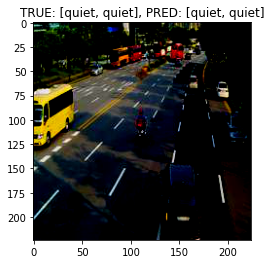

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


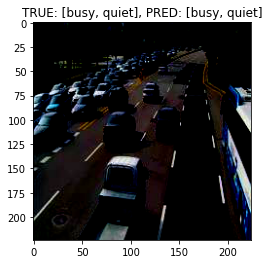

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


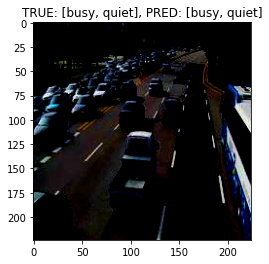

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


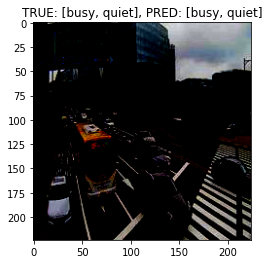

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


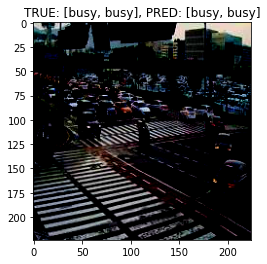

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


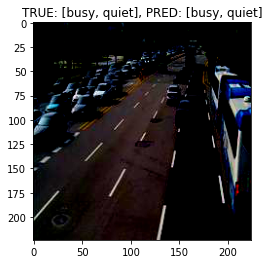

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


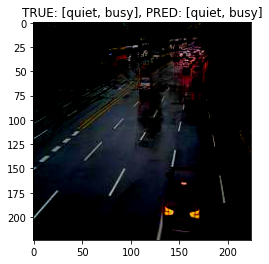

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


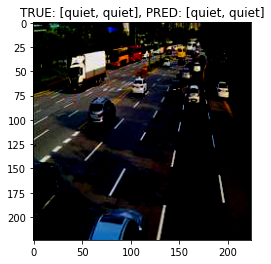

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


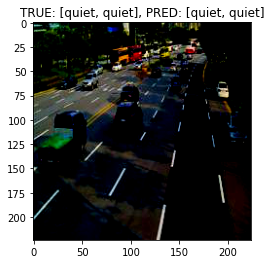

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


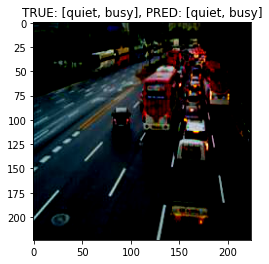

In [93]:
plot_state_on_image(model, dataloaders['val'], 10)